# Model 

In [52]:
import pandas as pd 
import numpy as np 
import pandas_profiling
from janitor import clean_names

In [114]:
add = pd.read_csv('raw_data/shs_aggregate_responses.csv').clean_names()
add.shape

(58530, 13)

In [54]:
add.isna().sum()
add.dropna().shape
add.columns

Index(['year', 'community_belonging', 'neighbourhood_rating',
       'distance_to_nearest_green_space',
       'satisfaction_with_nearest_green_space', 'age', 'gender',
       'economic_status', 'household_size', 'highest_education_level',
       'nearest_green_space_use', 'volunteering_last_twelve_months',
       'n_persons'],
      dtype='object')

In [55]:
#pandas_profiling.ProfileReport(add)

### Tidying 

In [60]:
# this dataset has a lot more information that I didn't have with the other data set 
# I want to keep them similar but I also don't want to get ride of all the extra ones 
# I will drop the ones that are far too different to my original data(eg. volunteering last 12 months)
# what is n_persons? 

In [61]:
add.drop(['year', 'volunteering_last_twelve_months', 'n_persons','highest_education_level'], axis = 1, inplace = True)
add.dropna(inplace = True)
add.isna().sum()

community_belonging                      0
neighbourhood_rating                     0
distance_to_nearest_green_space          0
satisfaction_with_nearest_green_space    0
age                                      0
gender                                   0
economic_status                          0
household_size                           0
nearest_green_space_use                  0
dtype: int64

In [62]:
add = add[add.distance_to_nearest_green_space != "Don't know"].copy()

In [63]:
(add['distance_to_nearest_green_space'].replace({'A 5 minute walk or less': 1,
                                         'More than a 30 minute walk away': 0,
                                         'Within a 21-30 minute walk': 0,
                                         'Within a 6-10 minute walk':1,
                                         'Within an 11-20 minute walk': 0}, inplace = True)
)

In [64]:
add_d = pd.get_dummies(add, drop_first = True)

add_d.head()

distance_to_nearest_green_space  household_size  \
6778                                1               3   
6779                                1               1   
6780                                1               2   
6781                                1               3   
6782                                1               3   

      community_belonging_Fairly strongly  \
6778                                    0   
6779                                    0   
6780                                    0   
6781                                    0   
6782                                    0   

      community_belonging_Not at all strongly  \
6778                                        0   
6779                                        0   
6780                                        0   
6781                                        0   
6782                                        0   

      community_belonging_Not very strongly  \
6778                                      0   
6779                                      0   
6780                                      0   
6781                                      0   
6782                                      0   

      community_belonging_Very strongly  neighbourhood_rating_Fairly poor  \
6778                                  0                                 0   
6779                                  0                                 0   
6780                                  0                                 0   
6781                                  0                                 0   
6782                                  0                                 0   

      neighbourhood_rating_No opinion  neighbourhood_rating_Very good  \
6778                                0                               0   
6779                                0                               0   
6780                                0                               0   
6781                                0                               0   
6782                                0                               0   

      neighbourhood_rating_Very poor  ...  economic_status_Retired  \
6778                               0  ...                        0   
6779                               0  ...                        0   
6780                               0  ...                        0   
6781                               0  ...                        0   
6782                               0  ...                        0   

      economic_status_Self Employed  economic_status_Training  \
6778                              0                         0   
6779                              0                         0   
6780                              0                         0   
6781                              0                         1   
6782                              0                         0   

      nearest_green_space_use_Every day  nearest_green_space_use_Less often  \
6778                                  0                                   0   
6779                                  0                                   0   
6780                                  0                                   0   
6781                                  0                                   0   
6782                                  0                                   0   

      nearest_green_space_use_Not at all  \
6778                                   0   
6779                                   0   
6780                                   0   
6781                                   0   
6782                                   0   

      nearest_green_space_use_Once a month  \
6778                                     0   
6779                                     0   
6780                                     0   
6781                                     1   
6782                                     0   

      nearest_green_space_use_Once a week  \
6778                                  

In [65]:
predictors = add_d.drop(columns = "distance_to_nearest_green_space")
response = add_d["distance_to_nearest_green_space"]

In [66]:
from sklearn.model_selection import train_test_split
pred_train,pred_test, resp_train, resp_test = (
    train_test_split(
        predictors, 
        response, 
        test_size = 0.1, 
        random_state = 7
    )
)

In [67]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 100)

model.fit(pred_train, resp_train)

RandomForestClassifier()

In [68]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(
    model, pred_train, resp_train, scoring='accuracy', cv=10
)
np.mean(scores)

0.8385344890198596

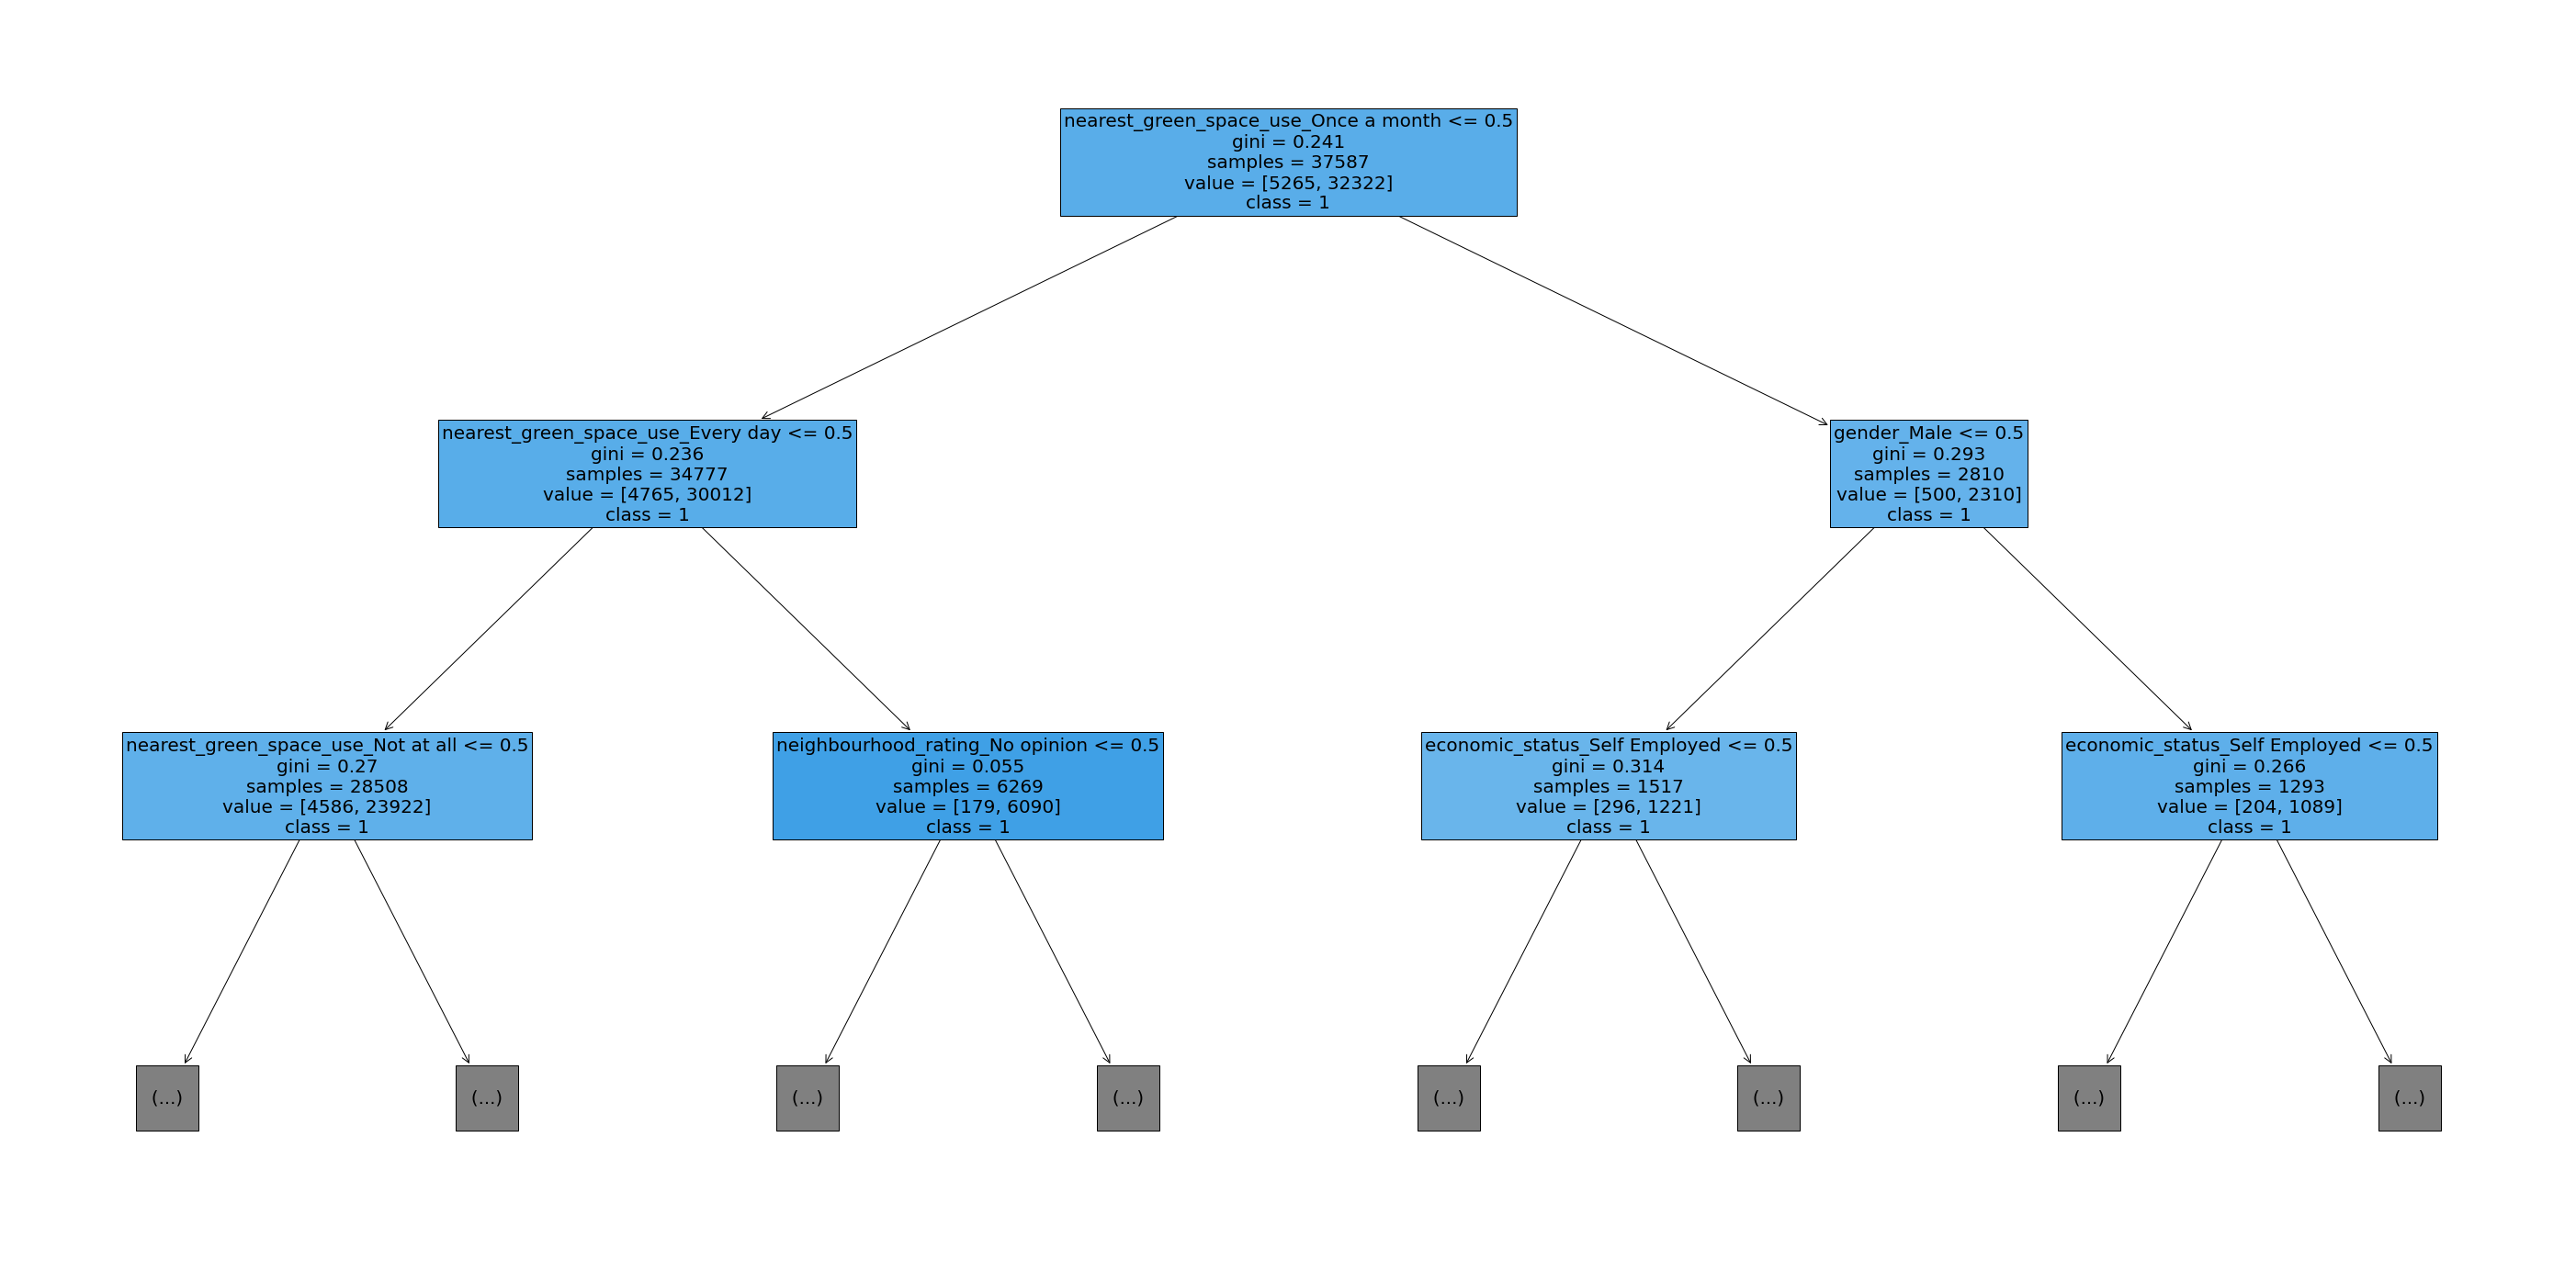

In [71]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


pred_names = list(pred_test)
resp_names = ['0', '1']


fig = plt.figure(figsize=(50, 25))


plot_tree(model.estimators_[0], 
          max_depth = 2, 
          feature_names = pred_names,
          class_names = resp_names, 
          filled=True,
          fontsize=20
         )

plt.savefig('clean_data/tree.png')

In [72]:

importances = list(model.feature_importances_)

feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(pred_names, importances)]

feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

[print('Variable: {:40} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: household_size                           Importance: 0.23
Variable: neighbourhood_rating_Very good           Importance: 0.07
Variable: gender_Male                              Importance: 0.07
Variable: age_35 - 64 Years                        Importance: 0.05
Variable: satisfaction_with_nearest_green_space_Fairly satisfied Importance: 0.04
Variable: economic_status_Other                    Importance: 0.04
Variable: community_belonging_Fairly strongly      Importance: 0.03
Variable: community_belonging_Not very strongly    Importance: 0.03
Variable: community_belonging_Very strongly        Importance: 0.03
Variable: neighbourhood_rating_Fairly poor         Importance: 0.03
Variable: satisfaction_with_nearest_green_space_No opinion Importance: 0.03
Variable: satisfaction_with_nearest_green_space_Very satisfied Importance: 0.03
Variable: economic_status_Part Time Employment     Importance: 0.03
Variable: economic_status_Self Employed            Importance: 0.03
Variable: near

In [73]:
### ummmm not very good 


# model 2 tree

In [86]:
add.columns

Index(['community_belonging', 'neighbourhood_rating',
       'distance_to_nearest_green_space',
       'satisfaction_with_nearest_green_space', 'age', 'gender',
       'economic_status', 'household_size', 'nearest_green_space_use'],
      dtype='object')

In [79]:
add.neighbourhood_rating.unique()

array(['Fairly good', 'No opinion', 'Very good', 'Very poor',
       'Fairly poor'], dtype=object)

In [80]:
(add['neighbourhood_rating'].replace({'Fairly good': 4,
                                         'Very good': 5,
                                         'Very poor': 1,
                                         'No opinion':3,
                                         'Fairly poor': 2}, inplace = True)
)

In [81]:
add.community_belonging.unique()

array(["Don't know", 'Fairly strongly', 'Not at all strongly',
       'Not very strongly', 'Very strongly'], dtype=object)

In [82]:
(add['community_belonging'].replace({'Fairly strongly': 4,
                                         'Very strongly': 5,
                                         'Not at all strongly': 1,
                                         "Don't know":3,
                                         'Not very strongly': 2}, inplace = True)
)

In [83]:
add.economic_status.unique()

array(['Full Time Employment', 'Training', 'Part Time Employment',
       'Other', 'Retired', 'Self Employed'], dtype=object)

In [84]:
(add['economic_status'].replace({'Full Time Employment': 1,
                                         'Training': 0,
                                         'Part Time Employment': 1,
                                         'Other':0,
                                         'Retired':0,
                                         'Self Employed': 1}, inplace = True)
)
#recoded as Salaried or not 

In [87]:
add.satisfaction_with_nearest_green_space.unique()

array(['Fairly dissatisfied', 'Fairly satisfied',
       'Neither satisfied nor dissatisfied', 'No opinion',
       'Very satisfied', 'Very dissatisfied'], dtype=object)

In [88]:
(add['satisfaction_with_nearest_green_space'].replace({'Fairly dissatisfied': 5,
                                         'Fairly satisfied': 4,
                                         'Neither satisfied nor dissatisfied': 3,
                                         'No opinion':3,
                                         'Very satisfied':5,
                                         'Very dissatisfied': 1}, inplace = True)
)

In [89]:
add.nearest_green_space_use.unique()

array(['Several times a month', 'Once a week', 'Once a month',
       'Several times a week', 'Every day', 'Not at all', 'Less often',
       "Don't know"], dtype=object)

In [90]:
(add['nearest_green_space_use'].replace({'Several times a month': 4,
                                         'Once a week': 5,
                                         'Once a month': 2,
                                         'Several times a week':6,
                                         'Every day':7,
                                         'Not at all': 1,
                                        'Less often':3 ,
                                        "Don't know":0}, inplace = True)
)

In [91]:
add_2 = pd.get_dummies(add, drop_first = True)

add_2.head()

community_belonging  neighbourhood_rating  \
6778                    3                     4   
6779                    3                     4   
6780                    3                     4   
6781                    3                     4   
6782                    3                     4   

      distance_to_nearest_green_space  satisfaction_with_nearest_green_space  \
6778                                1                                      5   
6779                                1                                      4   
6780                                1                                      4   
6781                                1                                      4   
6782                                1                                      4   

      economic_status  household_size  nearest_green_space_use  \
6778                1               3                        4   
6779                1               1                        5   
6780                1               2                        5   
6781                0               3                        2   
6782                1               3                        5   

      age_35 - 64 Years  age_65 + Years  gender_Male  
6778                  0               0            1  
6779                  0               0            0  
6780                  0               0            0  
6781                  0               0            0  
6782                  0               0            1

In [92]:
predictors = add_2.drop(columns = "distance_to_nearest_green_space")
response = add_2["distance_to_nearest_green_space"]

In [93]:
from sklearn.model_selection import train_test_split
pred_train,pred_test, resp_train, resp_test = (
    train_test_split(
        predictors, 
        response, 
        test_size = 0.1, 
        random_state = 7
    )
)

In [94]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 100)

model.fit(pred_train, resp_train)

RandomForestClassifier()

In [95]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(
    model, pred_train, resp_train, scoring='accuracy', cv=10
)
np.mean(scores)

0.8444144413528164

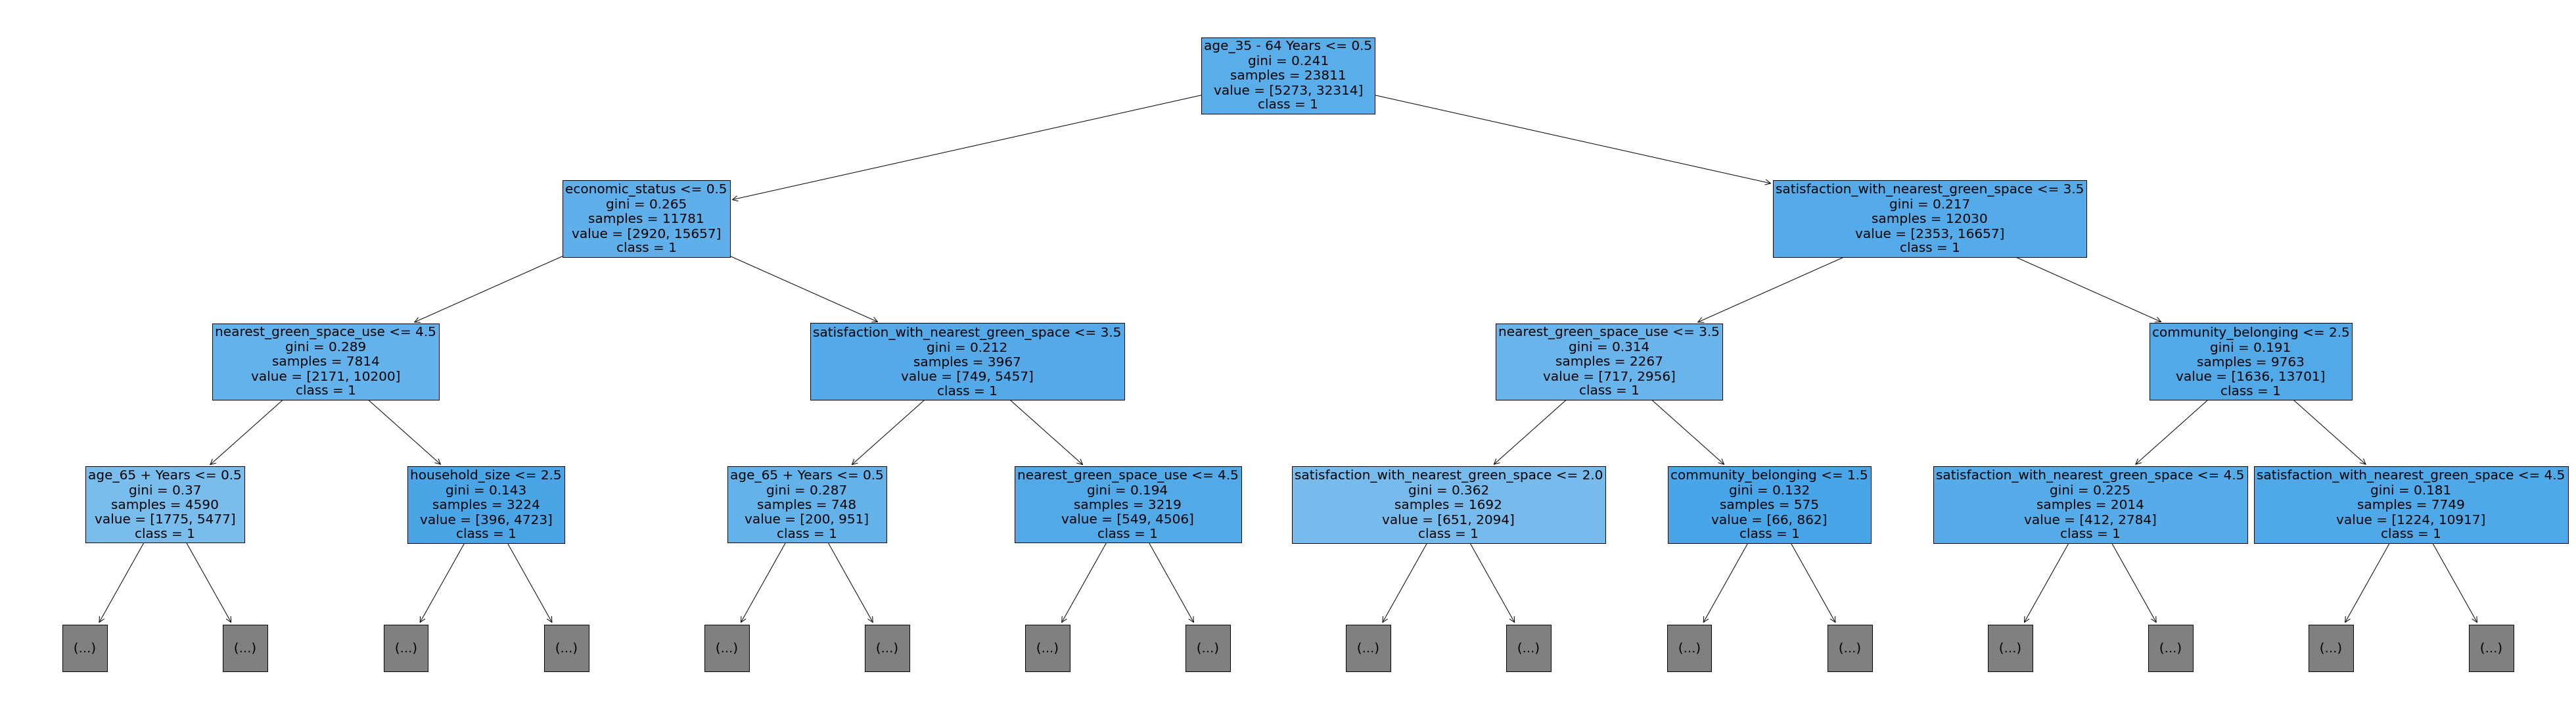

In [101]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


pred_names = list(pred_test)
resp_names = ['0', '1']


fig = plt.figure(figsize=(70, 20))


plot_tree(model.estimators_[0], 
          max_depth = 3, 
          feature_names = pred_names,
          class_names = resp_names, 
          filled=True,
          fontsize=20
         )

plt.savefig('clean_data/tree_2.png')

In [102]:
importances = list(model.feature_importances_)

feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(pred_names, importances)]

feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

[print('Variable: {:40} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: nearest_green_space_use                  Importance: 0.26
Variable: household_size                           Importance: 0.18
Variable: community_belonging                      Importance: 0.16
Variable: neighbourhood_rating                     Importance: 0.13
Variable: satisfaction_with_nearest_green_space    Importance: 0.1
Variable: gender_Male                              Importance: 0.06
Variable: age_35 - 64 Years                        Importance: 0.05
Variable: economic_status                          Importance: 0.04
Variable: age_65 + Years                           Importance: 0.02


[None, None, None, None, None, None, None, None, None]

# Is there any way to predict which households would have higher ratings?

In [122]:
add = pd.read_csv('raw_data/shs_aggregate_responses.csv').clean_names()

In [123]:
add.drop(['year', 'volunteering_last_twelve_months', 'n_persons'], axis = 1, inplace = True)
add.dropna(inplace = True)
add.isna().sum()

community_belonging                      0
neighbourhood_rating                     0
distance_to_nearest_green_space          0
satisfaction_with_nearest_green_space    0
age                                      0
gender                                   0
economic_status                          0
household_size                           0
highest_education_level                  0
nearest_green_space_use                  0
dtype: int64

In [117]:
add.highest_education_level.unique()

array(['Standard grade or equiv (SVQ level 1 or 2).',
       'Degree, Professional qualification (Above SVQ Level 4)',
       'HNC/HND or equivalent (SVQ Level 4)',
       'Higher, A level or equivalent (SVQ Level 3)',
       'Other qualification'], dtype=object)

In [124]:
(add['highest_education_level'].replace({'Standard grade or equiv (SVQ level 1 or 2).': 1,
                                         'Degree, Professional qualification (Above SVQ Level 4)': 4,
                                         'HNC/HND or equivalent (SVQ Level 4)': 3,
                                         'Higher, A level or equivalent (SVQ Level 3)':2,
                                         'Other qualification':0}, inplace = True)
)

In [119]:
add.distance_to_nearest_green_space.unique()

array(['A 5 minute walk or less', 'More than a 30 minute walk away',
       'Within a 6-10 minute walk', 'Within an 11-20 minute walk',
       'Within a 21-30 minute walk'], dtype=object)

In [130]:
(add['distance_to_nearest_green_space'].replace({'A 5 minute walk or less': 5,
                                         'More than a 30 minute walk away': 1,
                                         'Within a 6-10 minute walk': 4,
                                         'Within an 11-20 minute walk':3,
                                          'Within a 21-30 minute walk':2}, inplace = True)
)

In [125]:
(add['neighbourhood_rating'].replace({'Fairly good': 4,
                                         'Very good': 5,
                                         'Very poor': 1,
                                         'No opinion':3,
                                         'Fairly poor': 2}, inplace = True)
)

In [126]:
(add['community_belonging'].replace({'Fairly strongly': 4,
                                         'Very strongly': 5,
                                         'Not at all strongly': 1,
                                         "Don't know":3,
                                         'Not very strongly': 2}, inplace = True)
)

In [132]:
(add['economic_status'].replace({'Full Time Employment': 1,
                                         'Training': 0,
                                         'Part Time Employment': 1,
                                         'Other':0,
                                         'Retired':0,
                                         'Self Employed': 1}, inplace = True)
)

In [127]:
(add['satisfaction_with_nearest_green_space'].replace({'Fairly dissatisfied': 5,
                                         'Fairly satisfied': 4,
                                         'Neither satisfied nor dissatisfied': 3,
                                         'No opinion':3,
                                         'Very satisfied':5,
                                         'Very dissatisfied': 1}, inplace = True)
)

In [128]:
(add['nearest_green_space_use'].replace({'Several times a month': 4,
                                         'Once a week': 5,
                                         'Once a month': 2,
                                         'Several times a week':6,
                                         'Every day':7,
                                         'Not at all': 1,
                                        'Less often':3 ,
                                        "Don't know":0}, inplace = True)
)

In [134]:
add_3 = pd.get_dummies(add, drop_first = True)

add_3.head()

community_belonging  neighbourhood_rating  \
6778                    3                     4   
6779                    3                     4   
6780                    3                     4   
6781                    3                     4   
6782                    3                     4   

      distance_to_nearest_green_space  satisfaction_with_nearest_green_space  \
6778                                5                                      5   
6779                                5                                      4   
6780                                5                                      4   
6781                                5                                      4   
6782                                5                                      4   

      economic_status  household_size  highest_education_level  \
6778                1               3                        1   
6779                1               1                        4   
6780                1               2                        3   
6781                0               3                        3   
6782                1               3                        1   

      nearest_green_space_use  age_35 - 64 Years  age_65 + Years  gender_Male  
6778                        4                  0               0            1  
6779                        5                  0               0            0  
6780                        5                  0               0            0  
6781                        2                  0               0            0  
6782                        5                  0               0            1

In [146]:
predictors = add_3.drop(columns = "neighbourhood_rating")
response = add_3["neighbourhood_rating"]

In [147]:
from sklearn.model_selection import train_test_split
pred_train,pred_test, resp_train, resp_test = (
    train_test_split(
        predictors, 
        response, 
        test_size = 0.1, 
        random_state = 7
    )
)

In [148]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 100)

model.fit(pred_train, resp_train)

RandomForestClassifier()

In [149]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(
    model, pred_train, resp_train, scoring='accuracy', cv=10
)
np.mean(scores)

0.5832623648869963

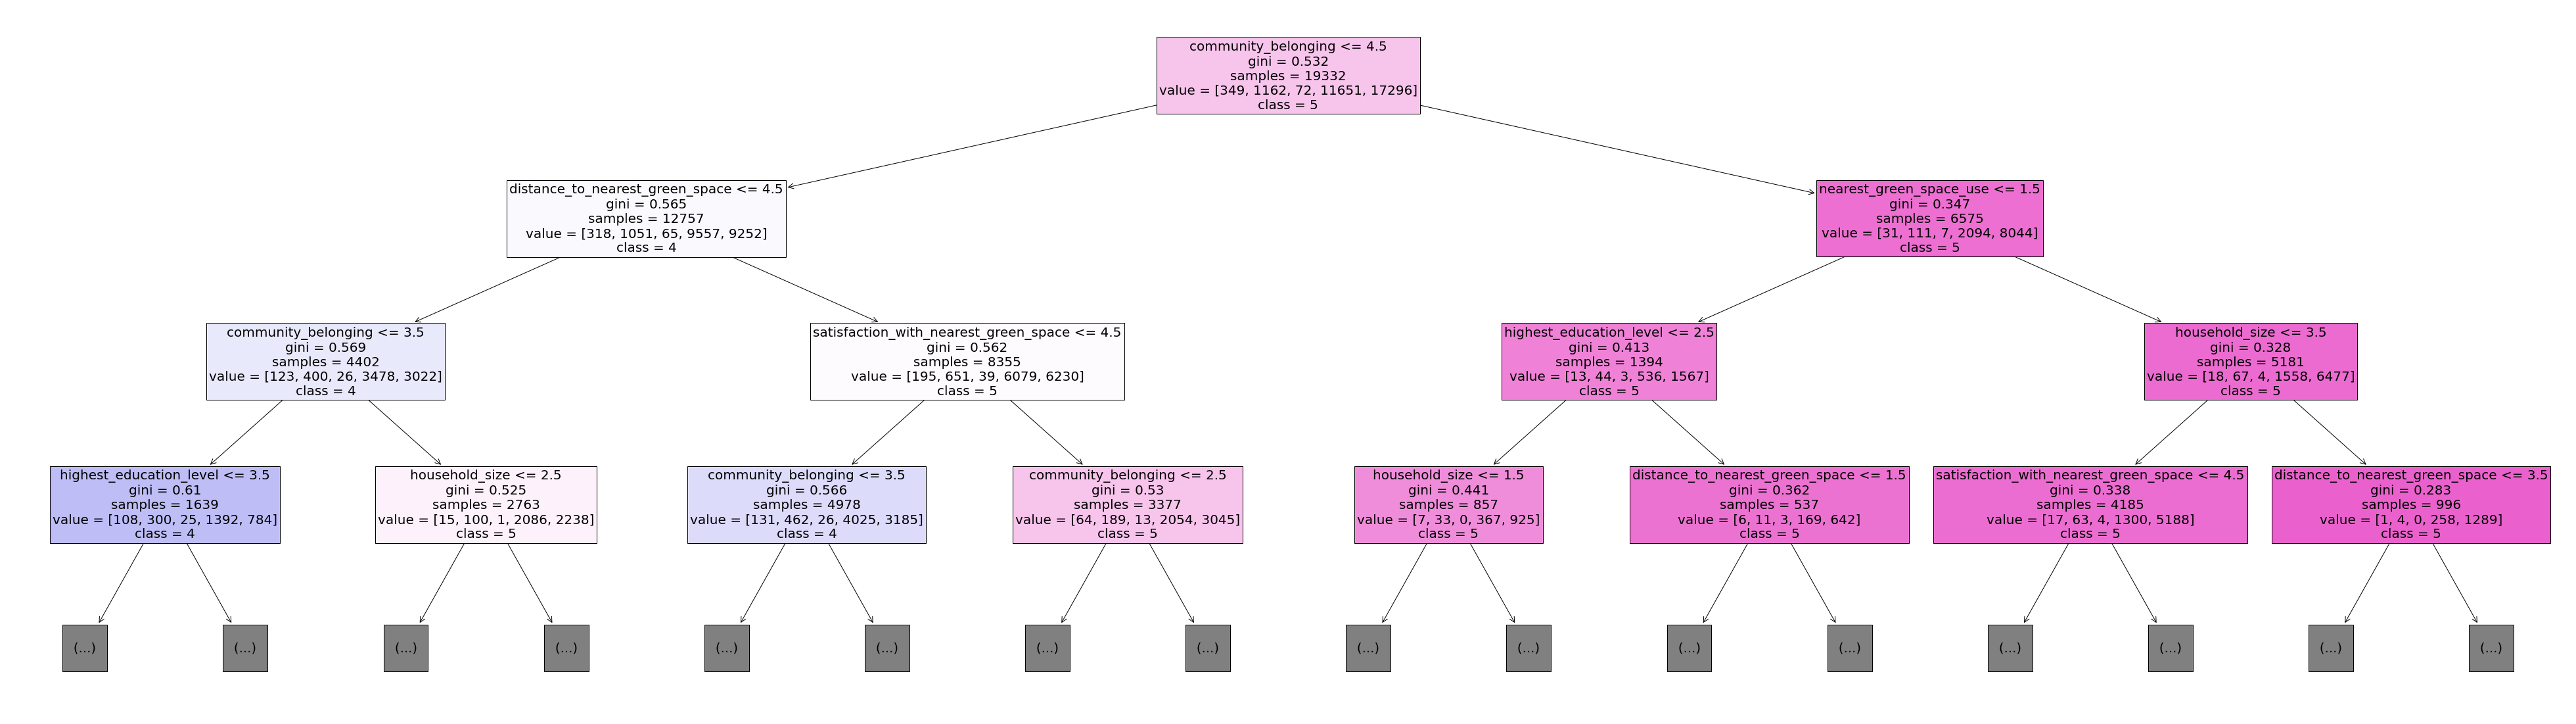

In [151]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


pred_names = list(pred_test)
resp_names = ['1','2','3','4','5']


fig = plt.figure(figsize=(70, 20))


plot_tree(model.estimators_[0], 
          max_depth = 3, 
          feature_names = pred_names,
          class_names = resp_names, 
          filled=True,
          fontsize=20
         )

plt.savefig('clean_data/tree_comm.png')

In [152]:
importances = list(model.feature_importances_)

feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(pred_names, importances)]

feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

[print('Variable: {:40} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: nearest_green_space_use                  Importance: 0.21
Variable: community_belonging                      Importance: 0.17
Variable: household_size                           Importance: 0.16
Variable: highest_education_level                  Importance: 0.12
Variable: distance_to_nearest_green_space          Importance: 0.11
Variable: satisfaction_with_nearest_green_space    Importance: 0.09
Variable: gender_Male                              Importance: 0.06
Variable: economic_status                          Importance: 0.04
Variable: age_35 - 64 Years                        Importance: 0.03
Variable: age_65 + Years                           Importance: 0.01


[None, None, None, None, None, None, None, None, None, None]